Conduct an EDA on Video Game Sales to examine the relationships between sales, genre and publishing company and platform

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.linear_model import LogisticRegression
import warnings # For handling error messages.

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Load Data
df = pd.read_csv('Video_Games_Sales_Cleaned.csv')

In [3]:
#check out appearance of data 
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8,E
1,1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E
2,2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8,E
3,3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E
4,4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1373 non-null   int64  
 1   Rank          1373 non-null   int64  
 2   Name          1373 non-null   object 
 3   Platform      1373 non-null   object 
 4   Year          1373 non-null   float64
 5   Genre         1373 non-null   object 
 6   Publisher     1373 non-null   object 
 7   NA_ Sales     1373 non-null   float64
 8   EU_Sales      1373 non-null   float64
 9   JP_Sales      1373 non-null   float64
 10  Other_Sales   1373 non-null   float64
 11  Global_Sales  1373 non-null   float64
 12  Critic_Score  1373 non-null   float64
 13  User_Score    1373 non-null   object 
 14  Rating        1372 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 161.0+ KB


Before conducting the EDA, let's perform some data cleaning. First, we'll remove the Unnamed: 0 column as it is redundant.
Second, we'll convert the Year column to integer. Third, we'll convert the User_Score column to float. We'll also drop the tbd values. Fourth, we'll drop any rows with missing values in the Rating column.
Fifth, we'll convert the Rank column to an index.
Finally, we'll create a new column called Total_Sales which is the sum of the sales in all regions. This will make it easier to compare total sales across different genres, publishers, and regions.

In [5]:
#Remove the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#Convert the Year column to integer
df['Year'] = df['Year'].astype(int)

In [7]:
df['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '7.4', '6.3', '8.2',
       '9', '7.9', '8.7', '7.1', '3.4', '5.3', '8.9', '7.8', '7.5', '2.6',
       '7.2', '7', '7.3', '4.3', '7.6', '9.1', '5.7', '6.5', '5.5', '8.8',
       '6.9', '6.8', '6.1', '4', '8.1', '5', '6.4', '9.3', '6', 'tbd',
       '4.9', '6.7', '9.2', '4.6', '5.9', '5.4', '5.8', '3.9', '5.6',
       '6.2', '2.9', '9.4', '5.2', '4.1', '4.5', '4.8', '3.5', '1.9',
       '3.1', '2.2', '2', '9.5', '5.1', '3.3', '4.4', '2.1'], dtype=object)

In [8]:
df[df['User_Score']=='tbd']

,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
198,303,Namco Museum: 50th Anniversary,PS2,2005,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98,61.0,tbd,E10+
422,628,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.46,71.0,tbd,E
693,1043,Game Party 3,Wii,2009,Puzzle,Warner Bros. Interactive Entertainment,1.43,0.16,0.00,0.12,1.71,37.0,tbd,E
701,1054,Personal Trainer: Math,DS,2007,Puzzle,Nintendo,0.49,1.12,0.00,0.09,1.70,63.0,tbd,E
768,1148,SpongeBob's Atlantis SquarePantis,DS,2007,Action,THQ,1.50,0.00,0.00,0.11,1.61,64.0,tbd,E
784,1173,MySims Kingdom,DS,2008,Simulation,Electronic Arts,0.81,0.60,0.01,0.17,1.58,58.0,tbd,E
820,1221,MySims Kingdom,Wii,2008,Simulation,Electronic Arts,0.71,0.65,0.01,0.17,1.53,58.0,tbd,E
865,1303,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,0.72,0.56,0.00,0.19,1.46,76.0,tbd,T
866,1304,Wall-E,DS,2008,Platform,THQ,0.46,0.83,0.00,0.17,1.46,54.0,tbd,E
951,1428,SingStar Abba,PS2,2008,Misc,Sony Computer Entertainment,0.23,0.04,0.00,1.09,1.36,64.0,tbd,T


In [9]:
df = df[df['User_Score'] != 'tbd']

In [10]:
#Convert the Rank column to an index
df.set_index('Rank', inplace=True)

In [11]:
#Create a new column called Total_Sales which is the sum of the sales in all regions
df['Total_Sales'] = df['NA_ Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [12]:
#Check out the appearance of data
df.head()

,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating,Total_Sales
Rank,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8,E,82.74
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E,35.83
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8,E,33.00
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E,29.01


In [13]:
df.dtypes

Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_ Sales       float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
User_Score       object
Rating           object
Total_Sales     float64
dtype: object

In [14]:
df["User_Score"] = df["User_Score"].astype(float)

In [15]:
df.dtypes

Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_ Sales       float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
User_Score      float64
Rating           object
Total_Sales     float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 1 to 2080
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1351 non-null   object 
 1   Platform      1351 non-null   object 
 2   Year          1351 non-null   int32  
 3   Genre         1351 non-null   object 
 4   Publisher     1351 non-null   object 
 5   NA_ Sales     1351 non-null   float64
 6   EU_Sales      1351 non-null   float64
 7   JP_Sales      1351 non-null   float64
 8   Other_Sales   1351 non-null   float64
 9   Global_Sales  1351 non-null   float64
 10  Critic_Score  1351 non-null   float64
 11  User_Score    1351 non-null   float64
 12  Rating        1350 non-null   object 
 13  Total_Sales   1351 non-null   float64
dtypes: float64(8), int32(1), object(5)
memory usage: 153.0+ KB


In [17]:
df.shape

(1351, 14)

In [18]:
df.to_csv('cleaned_data_videoGames.csv', index=False)

Now I can analyze the different sales of different platforms and their regional distribution. We can group the data by platform and sum the global_sales for each group. Then, we can sort the resulting dataframe by global_sales in descending order and select the top 5 platforms. Finally, we can plot a stacked bar chart to visualize the sales distribution of these platforms.

In [18]:
# group data by platform and sum global sales
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

In [19]:
# sort data in descending order and take top 5 platforms
top_platforms = sales_by_platform.sort_values(ascending=False).head(5)
print(top_platforms)

Platform
PS2     683.03
X360    655.94
PS3     605.86
Wii     566.93
DS      298.05
Name: Global_Sales, dtype: float64


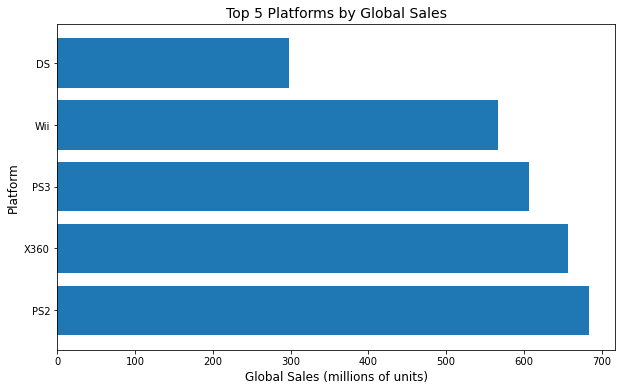

In [20]:
# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_platforms.index, top_platforms.values, align='center', color='tab:blue')

# set labels and title
ax.set_xlabel('Global Sales (millions of units)', fontsize=12)
ax.set_ylabel('Platform', fontsize=12)
ax.set_title('Top 5 Platforms by Global Sales', fontsize=14)

plt.show()

In [21]:
df['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'XB', 'PC', 'PSP',
       'GC', 'WiiU', 'GBA', 'PS', 'XOne', 'GB', 'N64', 'DC', 'PSV'],
      dtype=object)

In [22]:
#now I can try to see the relationship between genre and sales
# group data by genre and sum global sales
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum()

In [23]:
# sort data in descending order
sales_by_genre = sales_by_genre.sort_values(ascending=False)

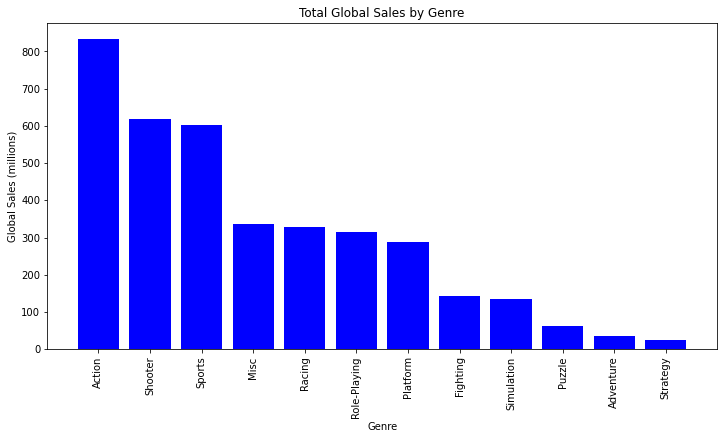

In [24]:
# create bar chart
plt.figure(figsize=(12,6))
plt.bar(sales_by_genre.index, sales_by_genre.values, color='blue')
plt.xticks(rotation=90) #I was getting an overlap on the x-axis, this prevents the overlap
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.title('Total Global Sales by Genre')
plt.show()

In [25]:
# create a pivot table to calculate global sales by genre
sales_by_genre = pd.pivot_table(df, values='Global_Sales', index='Genre', aggfunc=np.sum)

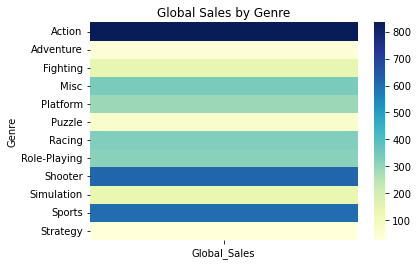

In [26]:
sns.heatmap(sales_by_genre, cmap="YlGnBu")
plt.title('Global Sales by Genre')
plt.show()

In [31]:
#To do this i need to prepare the genre column into numerical values. I will use one-hot encoding and 
X = pd.get_dummies(df['Genre'], drop_first=True)
y = df['Global_Sales']

In [33]:
sales_threshold = 1_000_000  # Set the sales threshold at 1 million copies
labels = np.where(df['Global_Sales'] >= sales_threshold, 1, 0)

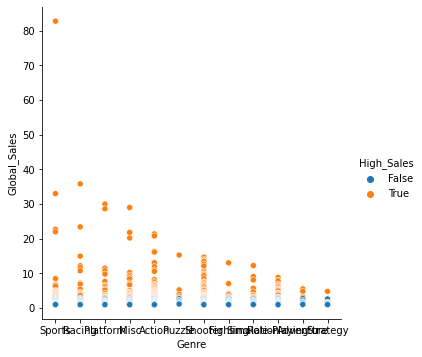

In [38]:
#Now to see the relationship genre and sales
# create a pairplot
sns.pairplot(data=df, x_vars=['Genre'], y_vars=['Global_Sales'], hue='High_Sales', height=5)

In [48]:
#I will take the top 5 genres and create a pairplot as the x axis is overlapping.
top_genres = df.groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False).head(5).index.tolist()
df_top = df.loc[df['Genre'].isin(top_genres)]

Text(0.5, 0.98, 'Top 5 Genres by Global Sales')

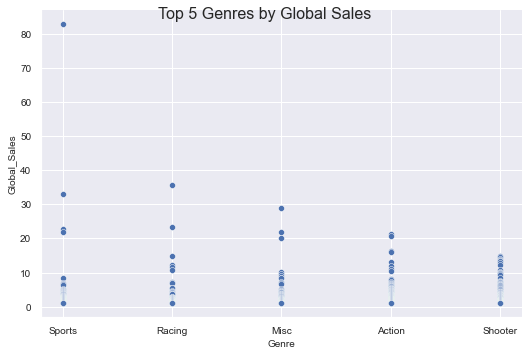

In [49]:
g = sns.pairplot(df_top, x_vars=['Genre'], y_vars=['Global_Sales'], height=5, aspect=1.5)
g.fig.suptitle('Top 5 Genres by Global Sales', fontsize=16)

In [51]:
#I would like to take a look at publishing company then finally move on to the relationship between user_scores/critic_scores 
#Publshing company will be the same as platform
sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum()
top_publisher = sales_by_publisher.sort_values(ascending=False).head(5)
print(top_publisher)

Publisher
Nintendo                       799.00
Electronic Arts                624.00
Activision                     417.92
Take-Two Interactive           280.34
Sony Computer Entertainment    250.17
Name: Global_Sales, dtype: float64


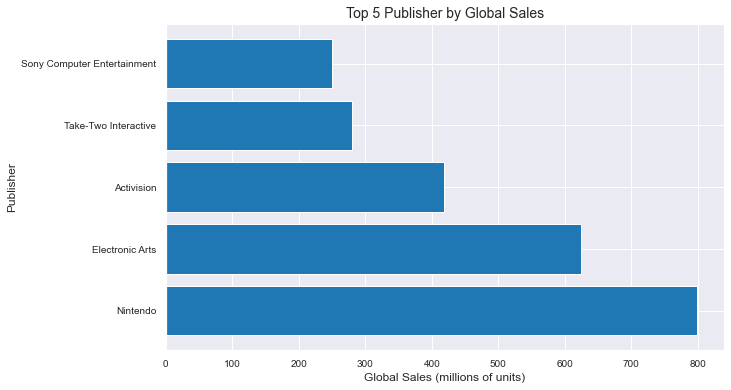

In [52]:
# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_publisher.index, top_publisher.values, align='center', color='tab:blue')

# set labels and title
ax.set_xlabel('Global Sales (millions of units)', fontsize=12)
ax.set_ylabel('Publisher', fontsize=12)
ax.set_title('Top 5 Publisher by Global Sales', fontsize=14)

plt.show()

In [53]:
#finally we will be doing a linear regression model between the user/critic score and sales
X = df[['User_Score', 'Critic_Score']]
y = df['Global_Sales']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

print("R-squared value:", r2_score)

R-squared value: 0.06599682295585096


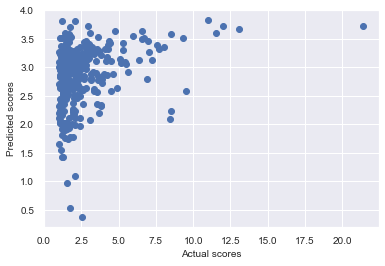

In [61]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Actual scores')
_ = plt.ylabel('Predicted scores')

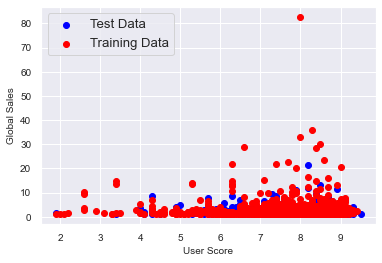

In [65]:
plt.scatter(X_test.values[:, 0], y_test.values, color='blue', label='Test Data')
plt.scatter(X_train.values[:, 0], y_train.values, color='red', label='Training Data')
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.legend(loc='upper left')
plt.show()

# Conclusion

After exploring this data, we can infer that the best selling genres are Action, Shooter, Sports, Racing and Role-Playing. There is a relationship between the how high a videogame scores on both User/Critic Scores as this can directly help sales globally. The top 5 platforms at the time the data was presented was made by Xbox, Nintendo, and Sony for DS, Wii, PS2. Because of this, we know they have the higher chances of pushing sales for our company. The best publisher would be Nintendo as they have the highest earnings globally.
